# Import Dependencies

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# Load Dataset and Print First 10 rows
pandas.read_csv(path) function read the .csv file from the 'path' directory.

data.head(n) pick first n rows of data dataframe and display() function print these rows.

In [ ]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/StudentsPerformance.csv')

In [ ]:
display(data.head(10))

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


# Exploratory Data Analysis

## Finding and Handling Missing Values
isnull() function return a dataframe by replacing all null values with boolean True and False otherwise. Here sum() count the number of True values. sort_values(ascending = False) function sort the null values of every columns in descending order.

In [ ]:
print(data.isnull().sum().sort_values(ascending=False))

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


As there are no null values handling of null values is not required.

## Finding and Handling Outliers
An outlier is a piece of data that is an abnormal distance from other points. In other words, it’s data that lies outside the other values in the set.
In statistics, outliers are extreme values that lie outside the range of the rest of the data. Whether significantly high or low, outliers deviate from data points that tend to cluster around a central value or follow a certain pattern.

### Interquartile Range (IQR)
An outlier is defined as being any point of data that lies over 1.5 IQRs below the first quartile (Q1) or above the third quartile (Q3)in a data set.

High = (Q3) + 1.5 IQR

Low = (Q1) – 1.5 IQR

In [ ]:
# Finding First Quartile Q1
math_Q1 = np.percentile(np.array(data['math score']).reshape(1,len(data)), 25)
reading_Q1 = np.percentile(np.array(data['reading score']).reshape(1,len(data)), 25)
writing_Q1 = np.percentile(np.array(data['writing score']).reshape(1,len(data)), 25)

# Finding Third Quartile Q3
math_Q3 = np.percentile(np.array(data['math score']).reshape(1,len(data)), 75)
reading_Q3 = np.percentile(np.array(data['reading score']).reshape(1,len(data)), 75)
writing_Q3 = np.percentile(np.array(data['writing score']).reshape(1,len(data)), 75)

# Finding Interquartile Range (IQR) = Q3 - Q1
math_IQR = math_Q3 - math_Q1
reading_IQR = reading_Q3 - reading_Q1
writing_IQR = writing_Q3 - writing_Q1

# Finding Low = Q1 - 1.5 * IQR
math_lower = int(math_Q1 - (1.5*math_IQR))
reading_lower = int(reading_Q1 - (1.5*reading_IQR))
writing_lower = int(writing_Q1 - (1.5*writing_IQR))

print(f'lowers : {math_lower,reading_lower,writing_lower}')

# Finding High = Q3 + 1.5 * IQR
math_upper = int(math_Q3 + (1.5*math_IQR))
reading_upper = int(reading_Q3 + (1.5*reading_IQR))
writing_upper = int(writing_Q3 + (1.5*writing_IQR))

print(f'uppers : {math_upper,reading_upper,writing_upper}')


lowers : (27, 29, 25)
uppers : (107, 109, 110)


In [ ]:
# Finding Outliers in different rows math score, reading score and writing score
math_outliers = []
for x in data['math score']:
  if x < math_lower or x > math_upper:
    math_outliers.append(x)

print(f'Number of outliers in math score {len(math_outliers)} and they are {math_outliers}')

reading_outliers = []
for x in data['reading score']:
  if x < reading_lower or x > reading_upper:
    reading_outliers.append(x)

print(f'Number of outliers in reading score {len(reading_outliers)} and they are {reading_outliers}')

writing_outliers = []
for x in data['writing score']:
  if x < writing_lower or x > writing_upper:
    writing_outliers.append(x)

print(f'Number of outliers in writing score {len(writing_outliers)} and they are {writing_outliers}')

Number of outliers in math score 8 and they are [18, 0, 22, 24, 26, 19, 23, 8]
Number of outliers in reading score 6 and they are [17, 26, 28, 23, 24, 24]
Number of outliers in writing score 5 and they are [10, 22, 19, 15, 23]


### Handling Outliers (Capping)
Capping is a way to impute the outliers with some other values. There can be mean, median or mode or any constant value also (that we gonna do here) leads to the condition where there will be no outliers in the dataset.

In [ ]:
for i in range(len(data)):
  ##row = i
  #col = [6,7,8]
  x = data.iloc[i,5]
  if x < math_lower:
    data.iloc[i,5] = math_lower
  elif x > math_upper:
    data.iloc[i,5] = math_upper

  x = data.iloc[i,6]
  if x < reading_lower:
    data.iloc[i,6] = reading_lower
  elif x > reading_upper:
    data.iloc[i,6] = reading_upper

  x = data.iloc[i,7]
  if x < writing_lower:
    data.iloc[i,7] = writing_lower
  elif x > writing_upper:
    data.iloc[i,7] = writing_upper

## Brief Summary of Data
DataFrame.describe() generate descriptive statistics. It's parameters are percentiles, include, exclude. It prints count, mean, standard deviation, max, min and 25, 50 and 75 percentile of the dataframe.

In [ ]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
data.describe(include = 'all')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


Here data type of all columns and value counts of every items for categorical columns and min, max and variance of numerical columns are printed.

In [ ]:
row,column = data.shape
columns = data.columns
print(f'The dataframe has "{row}" rows and "{column}" columns')
for column in columns:
  print(f'  Data type of "{column}" is : "{data[column].dtype}".')
  if data[column].dtype == 'int64':
    print(f'  Statistics of "{column}" : ')
    print(f'    Max value: {data[column].max()}')
    print(f'    Min value: {data[column].min()}')
    #print(f'    Mean: {data[column].mean()}')
    #print(f'    Median: {data[column].median()}')
    print(f'    Sum: {data[column].sum()}')
    #print(f'    Standard Deviation: {data[column].std()}')
    print(f'    Variance: {data[column].var()}')
    print('\n\n')
  else:
    count_values = data[column].value_counts()
    print(f'  Count of unique values in "{column}" : ')
    for item,count in count_values.items():
      print(f'    "{item}" : {count}.')
    print('\n\n')

The dataframe has "1000" rows and "8" columns
  Data type of "gender" is : "object".
  Count of unique values in "gender" : 
    "female" : 518.
    "male" : 482.



  Data type of "race/ethnicity" is : "object".
  Count of unique values in "race/ethnicity" : 
    "group C" : 319.
    "group D" : 262.
    "group B" : 190.
    "group E" : 140.
    "group A" : 89.



  Data type of "parental level of education" is : "object".
  Count of unique values in "parental level of education" : 
    "some college" : 226.
    "associate's degree" : 222.
    "high school" : 196.
    "some high school" : 179.
    "bachelor's degree" : 118.
    "master's degree" : 59.



  Data type of "lunch" is : "object".
  Count of unique values in "lunch" : 
    "standard" : 645.
    "free/reduced" : 355.



  Data type of "test preparation course" is : "object".
  Count of unique values in "test preparation course" : 
    "none" : 642.
    "completed" : 358.



  Data type of "math score" is : "int64".
  Statist

# Data Visualization

## The distribution of male and female students (Bar)
here bar plot of number of male and female students are shown. matplotlib.pyplot give functions like figure() to specify figure/plot size, bar() for plotting bar chart, xlabel() to insert label of x-axis, ylabel() to insert label of y-axis and title() for to set the title of the plot and finally show() function print the defined plot. bar() function takes parameters of classes, frequency count of classes, color etc.

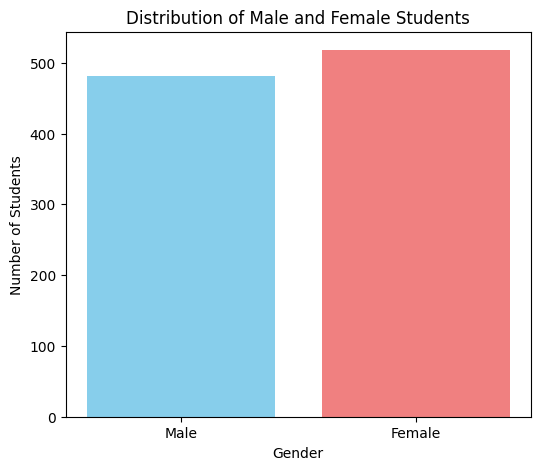

In [ ]:
counts = data['gender'].value_counts()
male_count = counts['male']
female_count = counts['female']

plt.figure(figsize=(6, 5))
class_labels = ['Male', 'Female']
class_counts = [male_count, female_count]
plt.bar(class_labels, class_counts, color=['skyblue', 'lightcoral'], align = 'center')
plt.xlabel('Gender')
plt.ylabel('Number of Students')
plt.title('Distribution of Male and Female Students')
plt.show()

## The distribution of the scores in math, reading, and writing. (Histogram)
hist() function plot the histogram of a column of the dataset to show the frequency in different range. it parameters are of input data, color, etc. actually it's parameters are almost same as bar().

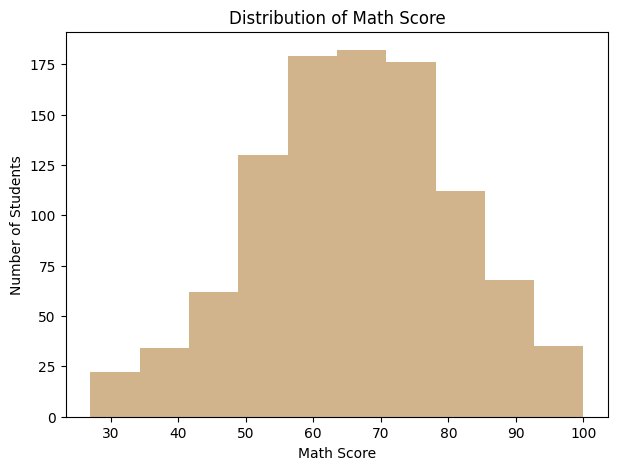

In [ ]:
plt.figure(figsize=(7,5))
plt.hist(data['math score'], color = 'tan')
plt.title('Distribution of Math Score')
plt.xlabel('Math Score')
plt.ylabel('Number of Students')
plt.show()

The distribution of scores is centered around 60-80, which suggests that this is the score that most students achieved. There are more students who scored in the 60-80 range than in any other range.

The distribution appears to be symmetrical, which means that there are just as many students who scored lower than 60-80 as there are who scored higher.

There is a wider spread of scores at the lower end of the distribution than at the higher end. This suggests that there are more variation in the performance of students who scored lower on the math exam.

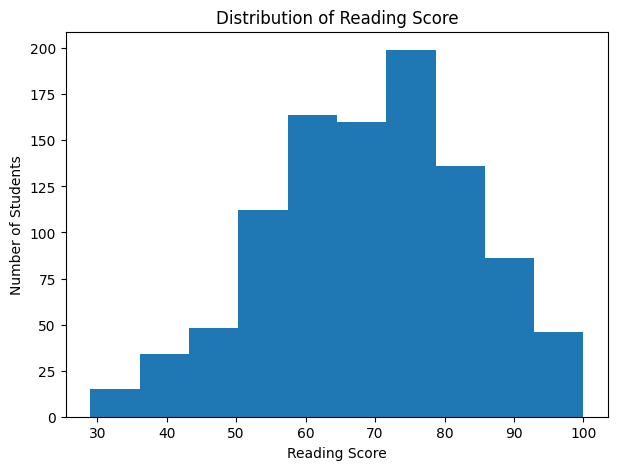

In [ ]:
plt.figure(figsize=(7,5))
plt.hist(data['reading score'])
plt.title('Distribution of Reading Score')
plt.xlabel('Reading Score')
plt.ylabel('Number of Students')
plt.show()

The distribution of scores is centered around 55-75, which suggests that this is the score that most students achieved. There are more students who scored in the 55-75 range than in any other range.

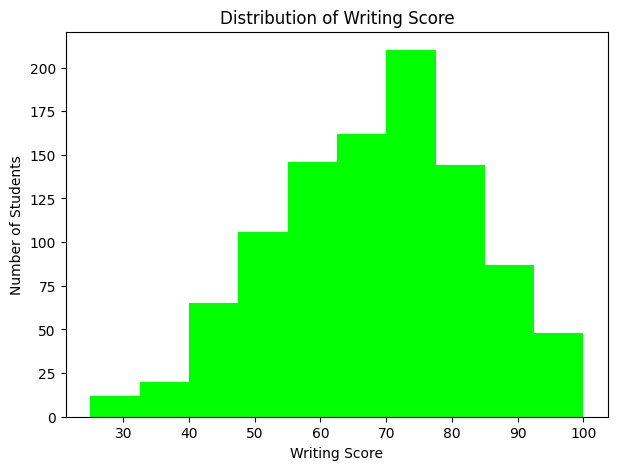

In [ ]:
plt.figure(figsize=(7,5))
plt.hist(data['writing score'], color = 'lime')
plt.title('Distribution of Writing Score')
plt.xlabel('Writing Score')
plt.ylabel('Number of Students')
plt.show()

The distribution of scores is centered around 55-80, which suggests that this is the score that most students achieved. There are more students who scored in the 55-80 range than in any other range.

legend() shows which color is representing which class/column in the plot.

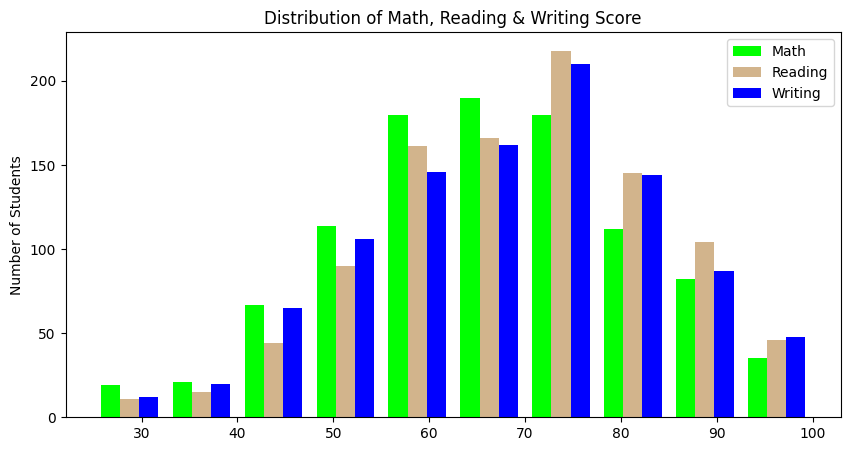

In [ ]:
plt.figure(figsize=(10,5))
plt.hist([data['math score'],data['reading score'],data['writing score']], color = ['lime','tan','blue'], label = ['Math','Reading','Writing'])
plt.title('Distribution of Math, Reading & Writing Score')
plt.legend(prop={'size': 10})
#plt.xlabel('Math Score')
plt.ylabel('Number of Students')
plt.show()

This plot reveals comparatively better results in Reading and Writing for students with higher marks. However, for the majority of students, the average Math score appears to be quite good.

## Average scores in math, reading, and writing for each gender. (Bar)
groupby() takes input one of the column name as parameter and differentiate data points based on the values or classes of this column. mean() gives output of mean of some data points. array[:] is the slicing property of list or arrays. subplot() takes 3 parameter -> number of rows, number of columns int the plot and last one is subplot number in the current row.

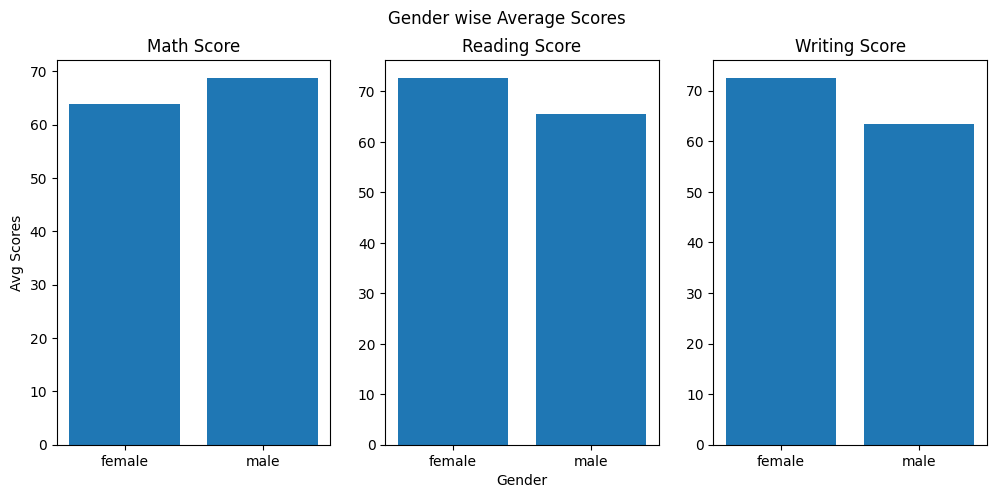

'\nprint(avg_math_score)\nprint(avg_reading_score)\nprint(avg_writing_score)\n'

In [ ]:
avg_math_score = data.groupby('gender')['math score'].mean()
avg_reading_score = data.groupby('gender')['reading score'].mean()
avg_writing_score = data.groupby('gender')['writing score'].mean()

plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
plt.bar(['female','male'],avg_math_score[:])
#plt.xlabel('Average Math Score')
plt.ylabel('Avg Scores')
plt.title('Math Score')

plt.subplot(1,3,2)
plt.bar(['female','male'],avg_reading_score[:])
plt.xlabel('Gender')
plt.title('Reading Score')

plt.subplot(1,3,3)
plt.bar(['female','male'],avg_writing_score[:])
#plt.xlabel('Gender')
plt.title('Writing Score')

plt.suptitle('Gender wise Average Scores')
plt.show()


The average score for females is better than males in all subjects except math. In math, males achieve a slightly higher average score than females. However, females outperform their male counterparts in reading and writing, with a noticeably greater average score.


## The relationship between math, reading, and writing scores (Scatter Plot)
The scatter plot prints all the data points. Here is the option to print data points of different classes with different colors in the same figure.

In [ ]:
print(len(data['math score']))

1000


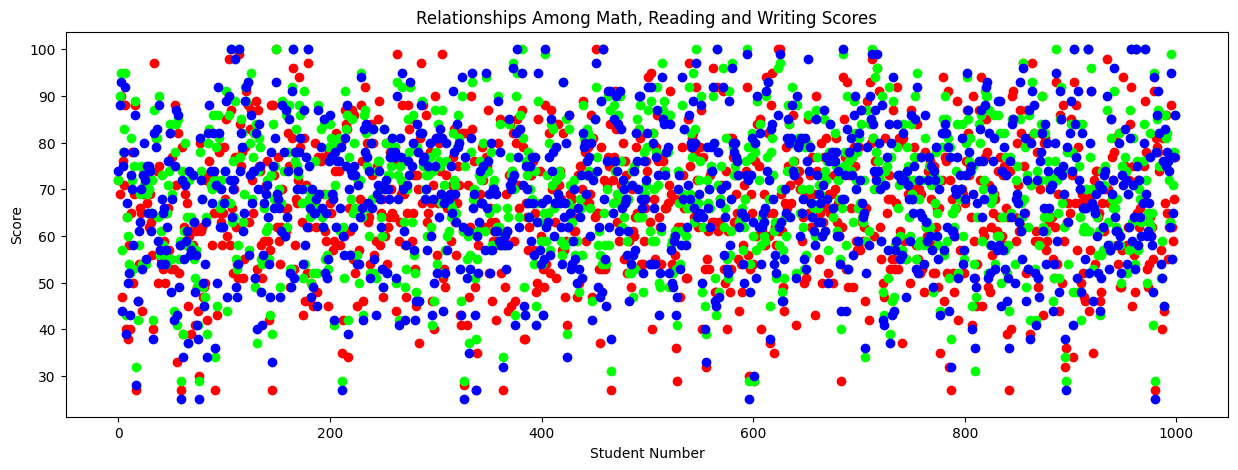

In [ ]:
students = np.arange(1000).reshape(1,1000)
plt.figure(figsize=(15,5))
plt.scatter(students, data['math score'], color = 'red')
plt.scatter(students, data['reading score'], color = 'lime')
plt.scatter(students, data['writing score'], color = 'blue')
plt.title('Relationships Among Math, Reading and Writing Scores')
plt.xlabel('Student Number')
plt.ylabel('Score')
plt.show()
#print(students.shape)

This plot shows that the range of 60-80 is the most densely populated. It also depicts that some students achieved a 100% score, while a noticeable number of students scored below 40%.

# Basic Statistical Analysis

## Finding Mean, Median and Mode
mean() find the average of the column/list, median() the midle element in the sorted list of array(1D). mode() find the most frequent number in the list or array or columns containing numerical data.

In [ ]:
print('=============Math============')
mean = data['math score'].mean()
print(f'Mean of Math Score : {mean}')
median = data['math score'].median()
print(f'Median of Math Score : {median}')
mode = data['math score'].mode()
print(f'Mode of Math Score : {mode}')
print('\n\n')

print('=============Reading============')
mean = data['reading score'].mean()
print(f'Mean of Reading Score : {mean}')
median = data['reading score'].median()
print(f'Median of Reading Score : {median}')
mode = data['reading score'].mode()
print(f'Mode of Reading Score : {mode}')
print('\n\n')

print('=============Writing============')
mean = data['writing score'].mean()
print(f'Mean of Writing Score : {mean}')
median = data['writing score'].median()
print(f'Median of Writing Score : {median}')
mode = data['writing score'].mode()
print(f'Mode of Writing Score : {mode}')

=============Math============
Mean of Math Score : 66.165
Median of Math Score : 66.0
Mode of Math Score : 0    65
Name: math score, dtype: int64



=============Reading============
Mean of Reading Score : 69.201
Median of Reading Score : 70.0
Mode of Reading Score : 0    72
Name: reading score, dtype: int64



=============Writing============
Mean of Writing Score : 68.09
Median of Writing Score : 69.0
Mode of Writing Score : 0    74
Name: writing score, dtype: int64


## Finding Standard Deviation
std() function find the standard deviation of a list of dataframe column of numerical type

In [ ]:
math = data['math score'].std()
print(f'Standard Deviation of Math Scores : {math}\n')
reading = data['reading score'].std()
print(f'Standard Deviation of Reading Scores : {reading}\n')
writing = data['writing score'].std()
print(f'Standard Deviation of Writing Scores : {writing}')

Standard Deviation of Math Scores : 14.92241446460503

Standard Deviation of Reading Scores : 14.503480615009279

Standard Deviation of Writing Scores : 15.080760237114353


## T-test to find significant difference between male and female students
A t-test is an inferential statistic used to determine if there is a significant difference between the means of two groups and how they are related. T-tests are used when the data sets follow a normal distribution and have unknown variances, like the data set recorded from flipping a coin 100 times.

The t-test is a test used for hypothesis testing in statistics and uses the t-statistic, the t-distribution values, and the degrees of freedom to determine statistical significance.

### Math Score

In [ ]:
from scipy.stats import ttest_ind
import scipy.stats as stats
# Manual

femaleMean, maleMean = data.groupby('gender')['math score'].mean()

femaleVar, maleVar = data.groupby('gender')['math score'].var()

nfemale, nmale = data['gender'].value_counts()

#print(maleMean, femaleMean)
#print(maleVar, femaleVar)
#print(nfemale, nmale)

#print(data['gender'].value_counts())
t_stat = (maleMean - femaleMean) / (((femaleVar / nfemale) + (maleVar / nmale))**(1/2))
#degrees of freedom
df = nmale + nfemale - 2

p_value = (1 - stats.t.cdf(abs(t_stat), df)) * 2
print(f'T-Score : {t_stat},  P-Value : {p_value}')
#print(t_stat, cv, p)

T-Score : 5.398000564160737,  P-Value : 8.420808739195706e-08


In [ ]:
# Using Library

female, male = [],[]
for i,x in data.iterrows():
  #print(x)
  if x['gender'] == 'female':
    female.append(x['math score'])
  elif x['gender'] == 'male':
    male.append(x['math score'])
#female = np.array(female).reshape(1,len(female))
#print(len(female),len(male))

t_stat, p_value = ttest_ind(male, female)
print(f'For Math Score --> T-Value : {t_stat} , P-Value : {p_value}')

For Math Score --> T-Score : 5.383245869828983 , P-Value : 9.120185549328822e-08


### Reading Score
iterrows() makes the dataframe iterable. list.append() adds element to the right of the list.

In [ ]:
female, male = [],[]
for i,x in data.iterrows():
  #print(x)
  if x['gender'] == 'female':
    female.append(x['reading score'])
  elif x['gender'] == 'male':
    male.append(x['reading score'])

t_stat, p_value = ttest_ind(male, female)
print(f'For Reading Score --> T-Value : {t_stat} , P-Value : {p_value}')

For Reading Score --> T-Score : -7.959308005187657 , P-Value : 4.680538743933289e-15


### Writing Score

In [ ]:
female, male = [],[]
for i,x in data.iterrows():
  #print(x)
  if x['gender'] == 'female':
    female.append(x['writing score'])
  elif x['gender'] == 'male':
    male.append(x['writing score'])
#female = np.array(female).reshape(1,len(female))
#print(len(female),len(male))

t_stat, p_value = ttest_ind(male, female)
print(f'For Writing Score --> T-Value : {t_stat} , P-Value : {p_value}')

For Writing Score --> T-Score : -9.979557910004507 , P-Value : 2.019877706867934e-22


Here, t-scores as p-values for math, reading, and writing scores are shown. It can be seen that in all cases, p-values are much less than the significance level. Therefore, it can be said that there are significant differences in all three cases.